In [1]:
#-*-coding:utf-8 -*-
#智联招聘职位数据挖掘分析
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#加载数据集
df=pd.read_csv('ml_jobs.csv',encoding='utf-8')

In [78]:
#查看数据表信息
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6555 entries, 16122 to 22896
Data columns (total 22 columns):
职位名称             6555 non-null object
公司名称             6555 non-null object
公司链接             6555 non-null object
职位链接             6555 non-null object
职位月薪             6555 non-null object
工作地点             6555 non-null object
发布日期             6555 non-null object
工作性质             6555 non-null object
工作经验             6555 non-null object
最低学历             6495 non-null object
招聘人数             6555 non-null object
职位类别             6555 non-null object
岗位职责描述           6019 non-null object
福利标签             5265 non-null object
bottom           6555 non-null object
top              6555 non-null object
average          6555 non-null object
工作城市             6555 non-null object
df_city          6433 non-null object
df_experience    6433 non-null object
df_average       5843 non-null float64
df_degree        6346 non-null object
dtypes: float64(1), object(21)
memory usage: 1.5+ M

In [4]:
#-*-数据清洗与处理-*-
df.index=df['job_id']

In [5]:
#删除原文件中'job_id'列
del(df['job_id'])

In [6]:
#对索引列重新排序
df_sort = df.sort_index()

In [7]:
#将重新排序后的对象赋予原数据表对象
df = df_sort

In [8]:
#查看'工作地点','职位月薪'两列的前10行数据
df[['工作地点','职位月薪']].head(10)

,工作地点,职位月薪
job_id,,
16122,北京-海淀区,25000-50000元/月
16123,北京,30001-50000元/月
16124,北京-东城区,50001-70000元/月
16125,北京,20001-30000元/月
16126,北京,10000-20000元/月
16127,北京-朝阳区,50001-70000元/月
16128,北京,15001-20000元/月
16129,北京,10001-15000元/月
16130,北京,12500-25000元/月


In [9]:
#用正则表达式处理'职位月薪'列
import re
#定义三列bottom,top,average分别存放最低月薪、最高月薪和平均月薪
df['bottom'] = df['top'] = df['average'] = df['职位月薪']
pattern = re.compile('([0-9]+)')
q1=q2=q3=q4=0
for i in range(len(df['职位月薪'])):
    item = df['职位月薪'].iloc[i].strip()
    result = re.findall(pattern,item)
    try:
        if result:
            try:
                #对于数值如8000-10000元/月的格式，处理后存放至bottom ,top ,average三个新列
                df['bottom'].iloc[i],df['top'].iloc[i] = result[0],result[1]
                df['average'].iloc[i] = str((int(result[0])+int(result[1]))/2)
                #q1统计职位月薪形如'8000-10000元/月'的次数
                q1+=1
            except:
                df['bottom'].iloc[i] = df['top'].iloc[i] = result[0]
                df['average'].iloc[i] = str((int(result[0])+int(result[0]))/2)
                #q2统计形如月收入'10000元/月以下'的次数
                q2+=1
        else:
            #对于字符如'面议','无内容'的格式,处理后保持原字符不变
            df['bottom'].iloc[i] = df['top'].iloc[i] = df['average'].iloc[i] = item
            #q3统计'无内容','面议'的次数；
            q3+=1
    except Exception as e:
        #q4统计特殊情况的次数
        q4+=1
        print(q4,item,repr(e))

In [10]:
#查看数据表中'职位月薪'与新增加3列的前10行数据
df[['职位月薪','bottom','top','average']].head(10)

,职位月薪,bottom,top,average
job_id,,,,
16122,25000-50000元/月,25000,50000,37500.0
16123,30001-50000元/月,30001,50000,40000.5
16124,50001-70000元/月,50001,70000,60000.5
16125,20001-30000元/月,20001,30000,25000.5
16126,10000-20000元/月,10000,20000,15000.0
16127,50001-70000元/月,50001,70000,60000.5
16128,15001-20000元/月,15001,20000,17500.5
16129,10001-15000元/月,10001,15000,12500.5
16130,12500-25000元/月,12500,25000,18750.0


In [11]:
#查看总统计分析样本数
print(q1+q2+q3+q4)

6555


In [12]:
#使用正则表达式进行'工作地点'列的处理，新增工作城市列，
df['工作城市'] = df['工作地点']
pattern2 = re.compile('(.*?)(\-)')
df_city = df['工作地点'].copy()
for i in range(len(df_city)):
    item = df_city.iloc[i].strip()
    result = re.search(pattern2,item)
    if result:
        #将工作地点中如'北京-海淀区','北京-东城区'等转化为'北京'存放在工作城市列
        df_city.iloc[i] = result.group(1).strip()
    else:
        #对于字符如'北京','无内容'的格式,处理后保持原字符不变
        df_city.iloc[i] = item.strip()

In [13]:
#新增加1列'工作城市'到数据表中
df['工作城市'] = df_city

In [14]:
#查看数据表中'工作地点'与新增加列前20行数据
df[['工作地点','工作城市']].head(20)

,工作地点,工作城市
job_id,,
16122,北京-海淀区,北京
16123,北京,北京
16124,北京-东城区,北京
16125,北京,北京
16126,北京,北京
16127,北京-朝阳区,北京
16128,北京,北京
16129,北京,北京
16130,北京,北京


In [15]:
#-*-数据分析-*-
"""
对于'机器学习'这个关键词的6555条招聘数据进行数据分析，由于招聘数据与工作城市、工作经验、最低学历和平均月薪等特征密切相关,
所以选取数据集中工作城市、工作经验、最低学历和平均月薪4个特征列进行分析。
"""
#1.不同城市的招聘数量分布情况分析
#统计每个城市的招聘数量
df['工作城市'].value_counts()

北京      2246
上海       835
深圳       651
杭州       318
广州       293
成都       261
南京       251
武汉       195
西安       168
苏州       131
无内容      122
济南       112
合肥       108
郑州       108
天津       103
长沙       100
厦门        85
福州        78
大连        70
重庆        55
青岛        45
石家庄       33
佛山        32
贵阳        30
太原        25
昆明        25
无锡        24
南宁        16
宁波        13
南昌        10
海口         7
呼和浩特       5
Name: 工作城市, dtype: int64

In [16]:
#汇总全部城市的招聘数量
df['工作城市'].value_counts().sum()

6555

In [17]:
#处理干扰数据，将原来df['工作城市']列中显示'无内容'的项替换成空值nan
df_city = df['工作城市'].replace(['无内容'],np.nan)

In [18]:
#统计有效城市数量
df_city.value_counts().count()

31

In [19]:
#将新的[df_city]列添加到数据表中
df['df_city'] = df_city

In [20]:
#统计有效职位数
df_city.value_counts().sum()

6433

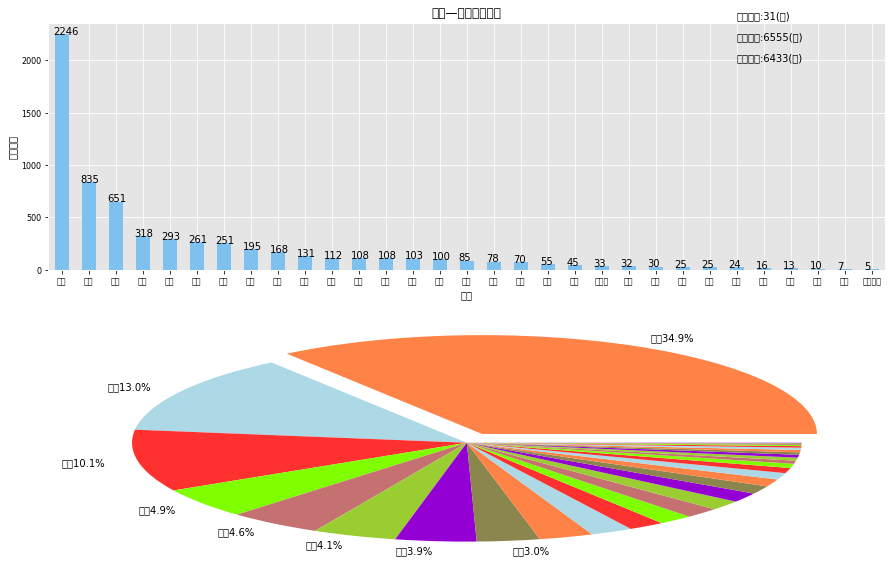

In [21]:
#-*-数据可视化-*-
matplotlib.style.use('ggplot')
#设置视图画布1
fig1 = plt.figure(1,facecolor = 'white',figsize=((15,10)))
#设置子图1
ax1 = fig1.add_subplot(2,1,1)
#设置轴的颜色为黑色
plt.tick_params(colors='black')
#画柱状图
df_city.value_counts().plot(kind='bar',rot=0,color='#7EC0EE',fontsize=8)
#设置图标题，x和y轴标题
title = plt.title('城市—职位数分布图',fontsize=12,color='black')
xlabel = plt.xlabel('城市',fontsize=10,color='black')
ylabel = plt.ylabel('职位数量',fontsize=10,color='black')
#设置说明，位置在图的右上角
text1 = ax1.text(25,2400,'城市总数:31(个)',fontsize=10, color='black')
text2 = ax1.text(25,2200,'职位总数:6555(个)',fontsize=10, color='black')
text3 = ax1.text(25,2000,'有效职位:6433(个)',fontsize=10, color='black')
#统计有效招聘数量
list_1=df_city.value_counts()
#添加每个城市的坐标值
for i in range(len(list_1)):
    ax1.text(i-0.3,list_1[i],str(list_1[i]),color='black')
#添加栅格线
plt.grid(True)
#设置子图2，是位于子图1下面的饼状图
ax2 = fig1.add_subplot(2,1,2)
#x是数值列表，
x = df_city.value_counts().values
#label_list是构造的列表，存储前8个城市名称+职位占比
label_list = []
for i in range(8):
    t = df_city.value_counts().values[i]/df_city.value_counts().sum()*100
    city = df_city.value_counts().index[i]
    percent = str('%.1f%%'%t)
    label_list.append(city+percent)
#显示前8个城市的城市名称和比例、其余的不显示，用空字符列表替代，为此需要构造列表label_list和一个空字符列表['']*23
labels = label_list + ['']*23
#explode即饼图中分裂的效果explode=（0.1，1，1）表示第一块图片显示为分裂效果
explode = tuple([0.1]+[0]*30)
colors='#FF8247','#ADD8E6','#FF3030','#7FFF00','#C67171','#9ACD32','#9400D3','#8B864E'
#饼图的比例根据数值占整体的比例而划分,通过构造labels手动显示饼图中每一块的比例
plt.pie(x,explode=explode,labels=labels,textprops={'color':'black'},colors=colors)
plt.show()

In [22]:
# 上图统计出排名靠前的8个城市提供的工作机会占比超过78%，说明提供机器学习相关岗位工作机会的城市主要集中在一线城市和新一线城市中
chance_num=0.0
for i in range(8):
    chance_num+=df_city.value_counts().values[i]/df_city.value_counts().sum()*100
print(chance_num)

78.5014767605


In [23]:
#2.不同工作经验的招聘数量分布情况分析
#统计不同工作经验的招聘数量
df['工作经验'].value_counts()

不限       2025
3-5年     1900
1-3年     1610
5-10年     593
无经验       200
无内容       122
1年以下       64
10年以上      41
Name: 工作经验, dtype: int64

In [24]:
#处理干扰数据，把'工作经验'中'无内容'项替换成空值nan
df_experience=df['工作经验'].replace(['无内容'],np.nan)

In [25]:
#统计处理后的数据
df_experience.value_counts()

不限       2025
3-5年     1900
1-3年     1610
5-10年     593
无经验       200
1年以下       64
10年以上      41
Name: 工作经验, dtype: int64

In [26]:
#统计处理后的工作经验样本数
df_experience.value_counts().sum()

6433

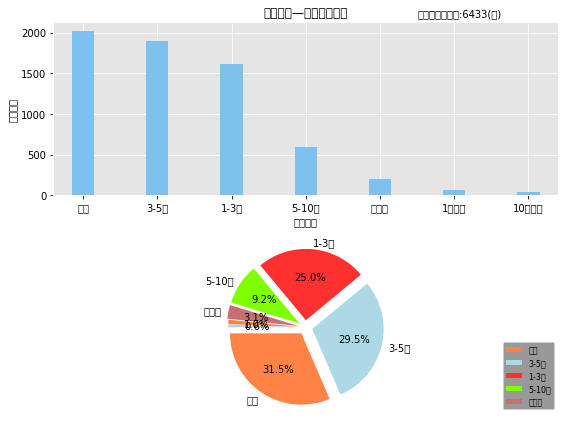

In [27]:
#-*-数据可视化-*-
matplotlib.style.use('ggplot')
fig2 = plt.figure(2,facecolor = 'white',figsize=((8,6)))
ax2_1 = fig2.add_subplot(2,1,1)
plt.tick_params(colors='black')
df_experience.value_counts().plot(kind = 'bar',rot = 0,color='#7EC0EE',width=0.3)
title = plt.title('工作经验—职位数分布图',fontsize =12,color = 'black')
xlabel = plt.xlabel('工作经验',fontsize =10,color = 'black')
ylabel = plt.ylabel('职位数量',fontsize =10,color = 'black')
#设置说明，位置在图的右上角
text1=ax2_1.text(4.5,2200,'工作经验样本数:6433(个)',fontsize=10,color='black')
plt.grid(True)
ax2_2 = fig2.add_subplot(2,1,2)
x2 = df_experience.value_counts().values
labels = list(df_experience.value_counts().index[:5])+['']*2
explode = tuple([0.1,0.1,0.1,0.1,0.1,0.08,0.08])
colors='#FF8247','#ADD8E6','#FF3030','#7FFF00','#C67171'
#参数autopct='%1.1f%%'来显示饼图中每一块的比例
plt.pie(x2,explode=explode,labels=labels,autopct='%1.1f%%',colors=colors,textprops={'color':'black'},startangle=180)
#显示为等比例圆形
plt.axis('equal')
#设置图例，方位为右下角
legend = ax2_2.legend(loc='lower right',shadow=False,fontsize=8)
#更改图例背景颜色
frame=legend.get_frame()
frame.set_facecolor('gray')
#布局自动调整
fig2.tight_layout()
plt.show()

In [28]:
#上图对工作经验的要求，'不限'+'无经验'+'1年以下'+'1-3年'占比超过60%，说明企业对机器学习岗位相关工作经验不是很丰富的求职者提供了一些工作机会
d=df_experience.value_counts()
(d['不限']+d['无经验']+d['1年以下']+d['1-3年'])/d.sum()

0.60609357997823721

In [29]:
#新增1列df_experience到数据表中
df['df_experience']=df_experience

In [30]:
#3.工作经验对于收入的影响情况分析
#统计数据表中平均月薪列的个数
df.average.value_counts()

面议         590
12500.5    575
17500.5    500
25000.5    431
15000.0    429
22500.0    388
30000.0    290
20000.0    289
40000.5    267
9000.5     227
5000.5     202
7000.5     190
11500.0    177
无内容        122
9000.0     113
3000.5     106
12000.0    101
37500.0     91
27500.0     80
12500.0     71
7500.0      64
10000.0     62
8000.0      61
25000.0     60
6000.0      55
16000.0     52
10500.0     49
17500.0     49
18000.0     46
32500.0     42
          ... 
2750.0       1
29000.0      1
12499.5      1
35500.0      1
3600.0       1
5650.0       1
11750.0      1
43500.0      1
4750.0       1
20000.5      1
46000.0      1
30500.0      1
76500.0      1
9999.0       1
10750.0      1
23333.5      1
45000.5      1
26250.0      1
53000.0      1
4600.0       1
9750.0       1
22498.5      1
8250.0       1
11999.5      1
6750.0       1
8999.5       1
37499.5      1
36000.0      1
17150.0      1
70000.0      1
Name: average, Length: 135, dtype: int64

In [31]:
#把平均月薪列中显示"面议"与"无内容"的项替换成空值
df_average = df['average'].replace(['面议','无内容'],np.nan)

In [32]:
#按工作经验与平均月薪列组成新的数据表df_exp_ave，得到不同工作经验字段下的平均月薪，
df_exp_ave=pd.DataFrame(data={'工作经验':df['df_experience'],'平均月薪':df_average})

In [33]:
#查看数据表df_exp_ave相关信息
df_exp_ave.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6555 entries, 16122 to 22896
Data columns (total 2 columns):
工作经验    6433 non-null object
平均月薪    5843 non-null object
dtypes: object(2)
memory usage: 153.6+ KB


In [34]:
#将数据表df中平均月薪列的类型由object类型转换成float类型
import re
pattern = re.compile('([0-9]+)')
#存放转换后的平均月薪数据
listi = []
for i in range(len(df.average)):
    item = df.average.iloc[i].strip()
    result = re.findall(pattern,item)
    try:
        if result:
            listi.append(float(result[0]))
        elif (item.strip()=='无内容' or item.strip()=='面议'):
            listi.append(np.nan)
        else:
            print(item)
    except Exception as e:
        print(item,type(item),repr(e))

In [35]:
#更新当前数据表df_exp_ave与数据表df中的平均月薪列
df_exp_ave['平均月薪'] = listi
df['df_average'] = df_exp_ave['平均月薪']

In [36]:
#统计每个平均月薪字段的个数
df_exp_ave['平均月薪'].value_counts()

12500.0    646
17500.0    549
25000.0    491
15000.0    429
22500.0    390
9000.0     340
40000.0    297
30000.0    290
20000.0    290
5000.0     211
7000.0     207
11500.0    177
3000.0     109
12000.0    101
37500.0     91
27500.0     80
7500.0      64
10000.0     62
8000.0      61
6000.0      55
16000.0     52
10500.0     49
18000.0     46
60000.0     44
32500.0     42
14000.0     41
45000.0     38
24000.0     34
6500.0      33
13500.0     32
          ... 
46000.0      1
8250.0       1
3850.0       1
4600.0       1
9750.0       1
76500.0      1
22498.0      1
26250.0      1
11750.0      1
2750.0       1
43500.0      1
9999.0       1
23333.0      1
29000.0      1
37499.0      1
44000.0      1
8999.0       1
4750.0       1
3600.0       1
2600.0       1
2000.0       1
53000.0      1
30500.0      1
70000.0      1
5650.0       1
36000.0      1
10750.0      1
12499.0      1
6750.0       1
17150.0      1
Name: 平均月薪, Length: 121, dtype: int64

In [37]:
#查看数据表df_exp_ave中平均月薪样本总数
df_exp_ave['平均月薪'].value_counts().sum()

5843

In [38]:
#查看数据表df_exp_ave中平均月薪样本总数平均值
df_exp_ave['平均月薪'].mean()

18786.41485538251

In [39]:
#针对平均月薪列按工作经验进行分组
exp_ave_group = df_exp_ave['平均月薪'].groupby(df_exp_ave['工作经验'])

In [40]:
#查看分组后工作经验列中各个字段平均值
exp_ave_group.mean()

工作经验
1-3年     16623.986230
10年以上    52948.717949
1年以下     11491.935484
3-5年     21428.644168
5-10年    28966.524691
不限       15837.190824
无经验       8012.096774
Name: 平均月薪, dtype: float64

In [41]:
#新增一项数据表df_exp_ave['平均月薪']的平均值
ave1 = pd.Series(data = {'平均值':df_exp_ave['平均月薪'].mean()})
result1 = exp_ave_group.mean().append(ave1)
#sort_values()方法可以对值进行排序，默认按照升序，round（1）表示小数点后保留1位小数。
result1.sort_values(ascending=False).round(1)

10年以上    52948.7
5-10年    28966.5
3-5年     21428.6
平均值      18786.4
1-3年     16624.0
不限       15837.2
1年以下     11491.9
无经验       8012.1
dtype: float64

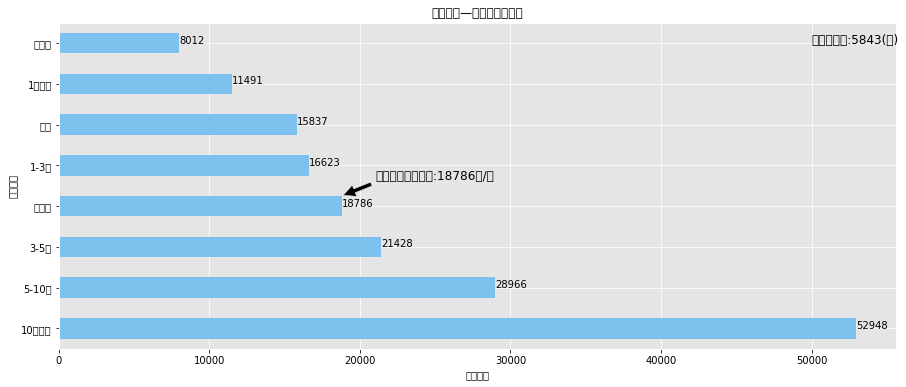

In [42]:
#-*-数据可视化-*-
matplotlib.style.use('ggplot')
fig3 = plt.figure(3,facecolor = 'white',figsize=((15,6)))
ax3 = fig3.add_subplot(1,1,1)
result1.sort_values(ascending=False).round(1).plot(kind='barh',rot=0,color='#7EC0EE')
#设置标题、x轴、y轴的标签文本
title = plt.title('工作经验—平均月薪分布图',fontsize = 12,color = 'black')
xlabel= plt.xlabel('平均月薪',fontsize = 10,color = 'black')
ylabel = plt.ylabel('工作经验',fontsize = 10,color = 'black')
#添加值标签
list1 = result1.sort_values(ascending=False).values
for i in range(len(list1)):
    ax3.text(list1[i],i,str(int(list1[i])),color='black')
#设置标识箭头
arrow = plt.annotate('机器学习平均月薪:18786元/月', xy=(18786,3.25), xytext=(21000,3.65),color='black',fontsize=12,arrowprops=dict(facecolor='black', shrink=0.05))
#设置图例注释（5843来源：df_exp_ave[u'平均月薪'].value_counts().sum()）
text= ax3.text(50000,7,'月薪样本数:5843(个)',fontsize=12, color='black')
#设置轴刻度文字颜色为黑色
plt.tick_params(colors='black')
plt.show()

In [43]:
#上图进一步说明了在机器学习相关领域工作经验越多，平均月薪越高

In [44]:
#4.工作城市对于收入的影响情况分析
#按'df_city'与'df_average'组成新的数据表df_city_ave
df_city_ave=pd.DataFrame(data={'工作城市':df['df_city'],'平均月薪':df['df_average']})

In [45]:
#查看数据表df_city_ave相关信息
df_city_ave.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6555 entries, 16122 to 22896
Data columns (total 2 columns):
工作城市    6433 non-null object
平均月薪    5843 non-null float64
dtypes: float64(1), object(1)
memory usage: 473.6+ KB


In [46]:
#针对平均月薪列按工作城市进行分组
city_ave_group = df_city_ave['平均月薪'].groupby(df_city_ave['工作城市'])

In [47]:
#查看对31个城市分组后，每个城市月薪的平均值
city_ave_group.mean()

工作城市
上海      21053.473616
佛山      12836.206897
北京      23615.836865
南京      14753.205128
南宁      10578.125000
南昌       8000.000000
厦门      15652.941176
合肥      12702.336449
呼和浩特     7600.000000
大连      14077.272727
天津      11615.000000
太原       6730.000000
宁波      12576.923077
广州      16233.035336
成都      14901.328000
无锡       9954.166667
昆明      10125.000000
杭州      19109.229730
武汉      11939.567708
济南      10432.882883
海口       9000.000000
深圳      19885.301852
石家庄      8151.515152
福州      15019.480519
苏州      15172.764228
西安      12322.784810
贵阳      10206.896552
郑州      13974.468085
重庆      12172.727273
长沙      12115.000000
青岛      11000.000000
Name: 平均月薪, dtype: float64

In [48]:
#查看对31个城市分组后，筛选出的平均月薪样本数
city_ave_group.count().sum()

5843

In [49]:
#新增一个df_city_ave['平均月薪']的平均值
ave2 = pd.Series(data = {'平均值':df_city_ave['平均月薪'].mean()})
result2 = city_ave_group.mean().append(ave2)
#对平均月薪值进行降序排列
result2.sort_values(ascending=False).round(1)

北京      23615.8
上海      21053.5
深圳      19885.3
杭州      19109.2
平均值     18786.4
广州      16233.0
厦门      15652.9
苏州      15172.8
福州      15019.5
成都      14901.3
南京      14753.2
大连      14077.3
郑州      13974.5
佛山      12836.2
合肥      12702.3
宁波      12576.9
西安      12322.8
重庆      12172.7
长沙      12115.0
武汉      11939.6
天津      11615.0
青岛      11000.0
南宁      10578.1
济南      10432.9
贵阳      10206.9
昆明      10125.0
无锡       9954.2
海口       9000.0
石家庄      8151.5
南昌       8000.0
呼和浩特     7600.0
太原       6730.0
dtype: float64

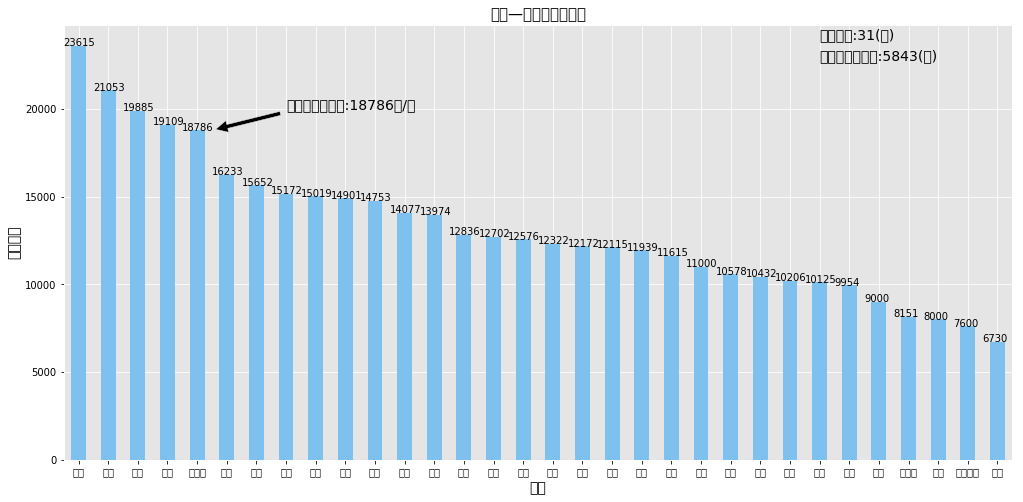

In [50]:
#-*-数据可视化-*-
matplotlib.style.use('ggplot')
fig4 = plt.figure(4,facecolor = 'white',figsize=((17,8)))
ax4 = fig4.add_subplot(1,1,1)
result2.sort_values(ascending=False).round(1).plot(kind='bar',rot=0.2,color='#7EC0EE')
#设置图标题，x和y轴标题
title = plt.title('城市—平均月薪分布图',fontsize=15,color='black')
xlabel = plt.xlabel('城市',fontsize=14,color='black')
ylabel = plt.ylabel('平均月薪',fontsize=14,color='black')
#设置说明，位置在图的右上角
text1 = ax4.text(25,24000,'城市总数:31(个)',fontsize=14, color='black')
text2 = ax4.text(25,22800,'平均月薪样本数:5843(个)',fontsize=14, color='black')
#添加每一个城市的坐标值
list2 = result2.sort_values(ascending=False).values
for i in range(len(list2)):
    ax4.text(i-0.5,list2[i],int(list2[i]),color='black')
#设置箭头注释
arrow = plt.annotate('全国月薪平均值:18786元/月', xy=(4.5,18786), xytext=(7,20000),color='black',fontsize=14,arrowprops=dict(facecolor='black', shrink=0.05))
plt.tick_params(colors='black')
plt.show()

In [51]:
#上图说明北上深杭这4个城市机器学习相关领域的平均月薪高于全国平均月薪

In [52]:
#5.招聘数量与学历的关联情况分析
#统计数据表'最低学历'的职位数
df['最低学历'].value_counts()

本科     3830
硕士     1184
不限      713
大专      514
无内容     122
博士      105
中专       16
中技        8
初中        2
其他        1
Name: 最低学历, dtype: int64

In [53]:
#处理干扰数据
df_degree=df['最低学历'].replace(['无内容','中专','中技','初中','其他'],np.nan)

In [54]:
#查看处理后的信息
df_degree.value_counts()

本科    3830
硕士    1184
不限     713
大专     514
博士     105
Name: 最低学历, dtype: int64

In [55]:
#统计处理后的职位样本数
df_degree.value_counts().sum()

6346

In [56]:
#新增1列'df_degree'到数据表中
df['df_degree']=df_degree

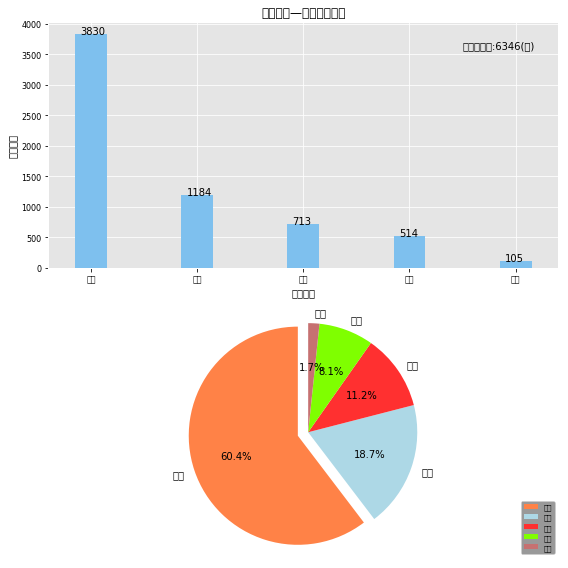

In [57]:
#-*-数据可视化-*-
matplotlib.style.use('ggplot')
fig5 = plt.figure(5,facecolor = 'white',figsize=((8,8)))
ax5_1 = fig5.add_subplot(2,1,1)
df_degree.value_counts().plot(kind = 'bar',rot=0,width=0.3,color='#7EC0EE')
#设置标题、x轴和y轴标题、图例文字
title = plt.title('最低学历—职位数分布图',fontsize = 12,color = 'black')
xlabel = plt.xlabel('最低学历',fontsize = 10,color = 'black')
ylabel = plt.ylabel('职位数量',fontsize = 10,color = 'black')
text1 = ax5_1.text(3.5,3600,'职位样本数:6346(个)',fontsize=10, color='black')
#设置坐标轴的的颜色和文字大小
plt.tick_params(colors='black',labelsize=8)
#设置坐标值文字
list5 = df_degree.value_counts().values
for i in range(len(list5)):
    ax5_1.text(i-0.1,list5[i],int(list5[i]),color='black')
ax5_2=fig5.add_subplot(2,1,2)
xl = df_degree.value_counts().values
labels = list(df_degree.value_counts().index)
explode = tuple([0.1,0,0,0,0])
colors='#FF8247','#ADD8E6','#FF3030','#7FFF00','#C67171'
plt.pie(xl,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',textprops={'color':'black'},startangle=90)
plt.axis('equal')
legend = ax5_2.legend(loc='lower right',shadow=False,fontsize=7)
frame=legend.get_frame()
frame.set_facecolor('gray')
plt.tick_params(colors='black',labelsize=13)
fig5.tight_layout()
plt.show()

In [58]:
#上图显示企业对最低学历为本科的求职者需求量最大，占比超过60%

In [59]:
#6.学历对于收入的影响情况分析
#按'df_degree'与'df_average'组成新的数据表df_deg_ave
df_deg_ave=pd.DataFrame(data={'最低学历':df['df_degree'],'平均月薪':df['df_average']})

In [60]:
#查看新数据表df_deg_ave相关信息
df_deg_ave.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6555 entries, 16122 to 22896
Data columns (total 2 columns):
平均月薪    5843 non-null float64
最低学历    6346 non-null object
dtypes: float64(1), object(1)
memory usage: 473.6+ KB


In [61]:
#按'最低学历'对'平均月薪'进行分组，并计算分组后的均值
deg_ave_group = df_deg_ave['平均月薪'].groupby(df_deg_ave['最低学历'])
deg_ave_group.mean()

最低学历
不限    16724.181548
博士    26740.737374
大专    11719.466403
本科    19211.439685
硕士    21509.836184
Name: 平均月薪, dtype: float64

In [62]:
#统计新数据表月薪样本数
deg_ave_group.count().sum()

5820

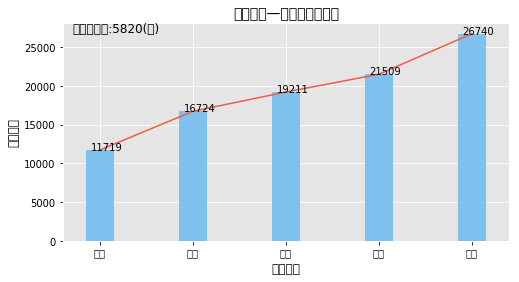

In [63]:
#-*-数据可视化-*-
matplotlib.style.use('ggplot')
fig6 = plt.figure(6,facecolor = 'white',figsize=((8,4)))
ax6 = fig6.add_subplot(1,1,1)
#在条形图上叠加一个折线图
deg_ave_group.mean().round(1).sort_values().plot(color = '#EE5C42')
deg_ave_group.mean().round(1).sort_values().plot(kind='bar',rot=0,width=0.3,color='#7EC0EE')
#设置标题、x轴、y轴的标签文本
title = plt.title('最低学历—平均月薪分布图',fontsize = 14,color = 'black')
xlabel= plt.xlabel('最低学历',fontsize = 12,color = 'black')
ylabel = plt.ylabel('平均月薪',fontsize = 12,color = 'black')
#添加值标签
list6 = deg_ave_group.mean().round(1).sort_values().values
for i in range(len(list6)):
    ax6.text(i-0.1,list6[i],int(list6[i]),color='black')
#设置图例注释
text= ax6.text(-0.3,27000,'月薪样本数:5820(个)',fontsize=12, color='black')
#设置轴刻度的文字颜色
plt.tick_params(colors='black')
plt.show()

In [64]:
#上图进一步说明学历越高，平均月薪越高

In [65]:
#7.学历与工作经验对于收入的影响情况分析
#按'df_degree'、'df_experience'与'df_average'组成新的数据表df_deg_exp_ave
df_deg_exp_ave = pd.DataFrame(data = {'平均月薪':df['df_average'],'最低学历':df['df_degree'],'工作经验':df['df_experience']})

In [66]:
#查看数据表df_deg_exp_ave信息
df_deg_exp_ave.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6555 entries, 16122 to 22896
Data columns (total 3 columns):
工作经验    6433 non-null object
平均月薪    5843 non-null float64
最低学历    6346 non-null object
dtypes: float64(1), object(2)
memory usage: 524.8+ KB


In [67]:
#按'最低学历'与'工作经验'的组合对'平均月薪'进行分组
deg_exp_ave_group = df_deg_exp_ave['平均月薪'].groupby([df_deg_exp_ave['最低学历'],df_deg_exp_ave['工作经验']])

In [68]:
#统计分组后的均值
deg_exp_ave_group.mean().round(1)

最低学历  工作经验 
不限    1-3年     14070.8
      1年以下      5000.0
      3-5年     17900.0
      5-10年    29733.3
      不限       16569.4
      无经验      15406.2
博士    1-3年     23733.3
      10年以上    32500.0
      1年以下     21250.0
      3-5年     35750.0
      5-10年    50000.0
      不限       25005.8
      无经验       5900.0
大专    1-3年     10981.2
      10年以上    25000.0
      1年以下      6794.1
      3-5年     15654.1
      5-10年    29386.4
      不限        7710.7
      无经验       4388.9
本科    1-3年     16285.0
      10年以上    52685.2
      1年以下      8900.0
      3-5年     21164.7
      5-10年    27362.8
      不限       15800.0
      无经验       6978.1
硕士    1-3年     20679.7
      10年以上    61388.9
      1年以下     15884.6
      3-5年     26026.2
      5-10年    34071.4
      不限       17386.8
      无经验       9107.1
Name: 平均月薪, dtype: float64

In [69]:
#统计不同学历下不同工作经验的职位数
deg_exp_ave_group.count()

最低学历  工作经验 
不限    1-3年       53
      1年以下        1
      3-5年       45
      5-10年      15
      不限        550
      无经验         8
博士    1-3年       15
      10年以上       2
      1年以下        2
      3-5年       12
      5-10年       6
      不限         57
      无经验         5
大专    1-3年      160
      10年以上       1
      1年以下       17
      3-5年      133
      5-10年      22
      不限        164
      无经验         9
本科    1-3年      985
      10年以上      27
      1年以下       15
      3-5年     1247
      5-10年     359
      不限        742
      无经验        57
硕士    1-3年      312
      10年以上       9
      1年以下       26
      3-5年      248
      5-10年      84
      不限        390
      无经验        42
Name: 平均月薪, dtype: int64

In [70]:
#统计分组后的职位样本数
deg_exp_ave_group.count().sum()

5820

In [71]:
#使用层次化索引对分组后的数据进行检索
deg_exp_ave_group.mean().round(1)[:,'1-3年']

最低学历
不限    14070.8
博士    23733.3
大专    10981.2
本科    16285.0
硕士    20679.7
Name: 平均月薪, dtype: float64

In [72]:
#对检索出来的数据进行排序
deg_exp_ave_group.mean().round(1)[:,'1-3年'].sort_values()

最低学历
大专    10981.2
不限    14070.8
本科    16285.0
硕士    20679.7
博士    23733.3
Name: 平均月薪, dtype: float64

In [73]:
#获得检索数据的索引
xlist = list(deg_exp_ave_group.mean().round(1)[:,'1-3年'].sort_values().index)

In [74]:
#对检索数据进行重新排序索引
deg_exp_ave_group.mean().round(1)[:,'1-3年'].reindex(xlist)

最低学历
大专    10981.2
不限    14070.8
本科    16285.0
硕士    20679.7
博士    23733.3
Name: 平均月薪, dtype: float64

In [75]:
#获得重新排序索引后的平均月薪值
deg_exp_ave_group.mean().round(1)[:,'无经验'].reindex(xlist).values

array([  4388.9,  15406.2,   6978.1,   9107.1,   5900. ])

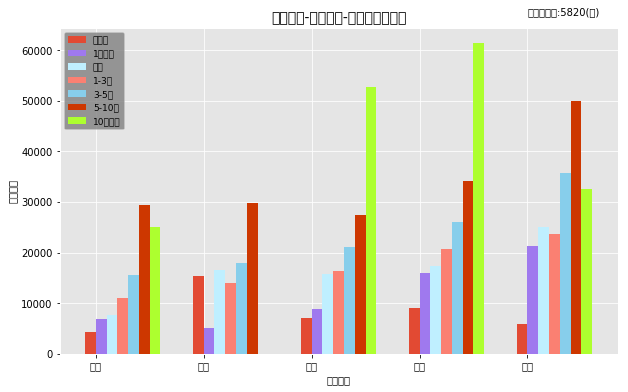

In [76]:
#-*-数据可视化-*-
matplotlib.style.use('ggplot')
fig7 = plt.figure(7,facecolor = 'white',figsize=((10,6)))
ax7 = fig7.add_subplot(1,1,1)
title = plt.title('最低学历-工作经验-平均月薪分布图',fontsize = 14,color = 'black')
xlabel = plt.xlabel('最低学历',fontsize = 10,color = 'black')
ylabel = plt.ylabel('平均月薪',fontsize = 10,color = 'black')
#img1~img7分别表示7种柱状图
#ind为x轴宽度，用numpy的array形式表示
ind = np.arange(5)
#ylist1~7分别是7种柱状图的Y值列表
ylist1 = deg_exp_ave_group.mean().round(1)[:,'无经验'].reindex(xlist).values
ylist2 = deg_exp_ave_group.mean().round(1)[:,'1年以下'].reindex(xlist).values
ylist3 = deg_exp_ave_group.mean().round(1)[:,'不限'].reindex(xlist).values
ylist4 = deg_exp_ave_group.mean().round(1)[:,'1-3年'].reindex(xlist).values
ylist5 = deg_exp_ave_group.mean().round(1)[:,'3-5年'].reindex(xlist).values
ylist6 = deg_exp_ave_group.mean().round(1)[:,'5-10年'].reindex(xlist).values
ylist7 = deg_exp_ave_group.mean().round(1)[:,'10年以上'].reindex(xlist).values
#柱状图的宽度
width = 0.1
img1 = ax7.bar(ind,ylist1,width)
img2 = ax7.bar(ind+width,ylist2,width,color='#9F79EE')
img3 = ax7.bar(ind+width*2,ylist3,width,color='#BFEFFF')
img4 = ax7.bar(ind+width*3,ylist4,width,color='#FA8072')
img5 = ax7.bar(ind+width*4,ylist5,width,color='#87CEEB')
img6 = ax7.bar(ind+width*5,ylist6,width,color='#CD3700')
img7 = ax7.bar(ind+width*6,ylist7,width,color='#ADFF2F')
#设置X轴文本和位置调整
ax7.set_xticklabels(xlist)
ax7.set_xticks(ind + width / 2)
#设置文字说明
text1 = ax7.text(4.05,67000,'职位样本数:5820(个)',fontsize=10, color='black')
#设置图例
legend=ax7.legend((img1[0],img2[0],img3[0],img4[0],img5[0],img6[0],img7[0]), ('无经验','1年以下','不限','1-3年','3-5年','5-10年','10年以上'),fontsize=9,loc='best',shadow=False)
#设置图例背景色
frame = legend.get_frame()
frame.set_facecolor('gray')
#设置栅格
plt.grid(True)
plt.tick_params(colors='black',labelsize=10)
plt.show()

In [77]:
#上图显示与机器学习相关岗位平均月薪最高的3个组合分别为:[硕士+工作经验10年以上]、[本科+工作经验10年以上]以及[博士+工作经验5-10年]